<a href="https://colab.research.google.com/github/lukeoverbeck/AI/blob/main/CSC_362_HW2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1 (10 points)**

In a social media platform, two users can be represented by nodes and an edge between them that determines some form of professional or personal connection. An **undirected edge** can indicate that both are friends while a **directed edge** would mean that only one follows the other in the direction of the edge.

We can use **BFS** to gain general insights about users such as:

1. Finding all the friends of all the people in the network.
2. Finding all the mutual friends for a node in the network.
3. Finding the nth level friends for a person in the network.
4. Etc.

In the graph below, we have a social network which has a provision such that two users with ids 1 and 2 can become friends when 1 sends a request to 2 and 2 accepts or vice versa. So, if User 1 and User 2 are friends, and User 2 and User 3 are friends, then with respect to User 1, User 2 is a **first-level** friend and User 3 is a **second-level** friend. Similarly if Users 4 and 5 are friends with 3, then with respect to User 1, Users 4 and 5 are third-level friends of User 1, and so on.

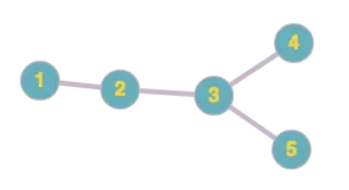

Your task is to use the **BFS** algorithm to return the **k**th-level friend for a given user and graph: **FindFriends(G, User, K)**. Test your algorithm on the network shown below:

**FindFriends(G, 'Bob', 3)** should print **Amy** and **Anna**.

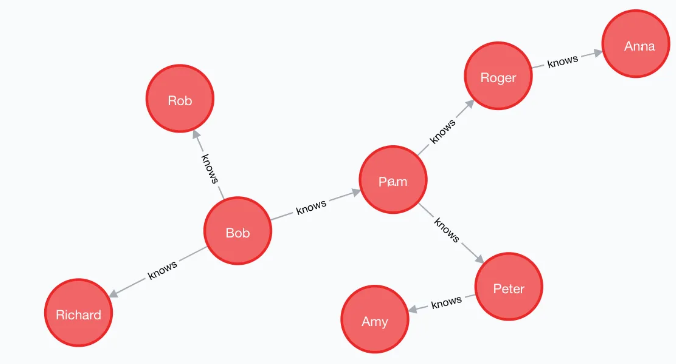

In [ ]:
from collections import deque

# Start the graph search from root using a doubly-ended queue

def FindFriends(graph, user, k):

    # Return the root if k = 0
    if k == 0:
      return [user]

    # deque is list-like container with fast appends and pops on either end
    visited, queue = set(), deque([(user, 0)])
    visited.add(user)
    result = []

    # Keep exploring as long as the queue is not empty
    while queue:

        # Dequeue a node from queue
        node = queue.popleft()
        vertex = node[0]
        cur_level = node[1]

        # Append the name to result if cur_level matches target level
        if cur_level == k:
          result.append(vertex)

        # If not visited, mark it as visited, and enqueue it while incrementing the level by 1
        elif cur_level < k:
          for neighbor in graph[vertex]:
              if neighbor not in visited:
                  visited.add(neighbor)
                  queue.append((neighbor, cur_level + 1))

    return result

In [4]:
graph1 = {
    'Richard' : ['Bob'],
    'Bob' : ['Richard', 'Rob', 'Pam'],
    'Rob' : ['Bob'],
    'Pam' : ['Bob', 'Roger', 'Peter'],
    'Roger' : ['Pam', 'Anna'],
    'Anna' : ['Roger'],
    'Peter' : ['Pam', 'Amy'],
    'Amy' : ['Peter']
}

print(FindFriends(graph1, 'Bob', 2))

['Roger', 'Peter']
